# SMOTE-XGBoost

## Library

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import graphviz
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.impute import KNNImputer #(penanganan missing value)

# SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

# Evaluasi model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
import seaborn as sns

## Import Data

In [2]:
data = pd.read_excel('C:/Users/user/Desktop/One Drive_Raymond/OneDrive/Dokumen/Skripsi/data skripsi.xlsx',sheet_name='skripsi')
data

,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Simeulue,17.86,18.37,493303,31.02,100.00,100.00,54.47,60.37,69.77,66.74,20.94,2.73
1,Aceh Singkil,24.33,19.18,518951,26.24,97.56,96.59,61.22,59.49,77.94,85.08,42.00,3.18
2,Aceh Selatan,30.78,12.43,446224,22.51,100.00,100.00,47.37,61.11,65.87,56.85,46.38,1.31
3,Aceh Tenggara,28.42,12.83,430825,42.29,100.00,100.00,36.42,56.68,86.13,55.99,7.73,1.92
4,Aceh Timur,62.16,13.91,491550,19.86,100.00,100.00,57.98,62.28,84.56,69.51,24.88,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,41.28,36.25,754778,3.88,46.33,45.95,11.15,70.85,98.91,9.37,NaN,8.20
510,Dogiyai,29.32,29.48,592213,15.17,72.37,63.12,9.45,46.62,78.83,52.68,NaN,6.07
511,Intan Jaya,21.86,42.03,769993,12.51,39.83,51.88,18.40,70.05,98.80,86.80,NaN,5.27
512,Deiyai,31.04,40.31,647902,10.92,84.21,62.06,50.78,70.22,99.10,96.96,NaN,6.99


## Preprocessing

In [3]:
# Identifikasi jumlah baris & kolom
data.shape

(514, 13)

In [4]:
# Identifikasi tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  514 non-null    object 
 1   X1              514 non-null    float64
 2   X2              514 non-null    float64
 3   X3              514 non-null    int64  
 4   X4              514 non-null    float64
 5   X5              514 non-null    float64
 6   X6              514 non-null    float64
 7   X7              514 non-null    float64
 8   X8              514 non-null    float64
 9   X9              513 non-null    float64
 10  X10             514 non-null    float64
 11  X11             483 non-null    float64
 12  Y               514 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.3+ KB


In [5]:
# Identifikasi missing value
data.isnull().sum()

Kabupaten/Kota     0
X1                 0
X2                 0
X3                 0
X4                 0
X5                 0
X6                 0
X7                 0
X8                 0
X9                 1
X10                0
X11               31
Y                  0
dtype: int64

In [6]:
rows_data_missing = data[data.isnull().any(axis=1)]
rows_data_missing

,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
70,Kota Sawah Lunto,1.47,2.28,443301,38.36,100.00,100.00,30.21,49.78,100.00,84.12,NaN,0.34
91,Muaro Jambi,20.64,4.47,462035,18.39,100.00,100.00,49.86,59.32,67.16,86.89,NaN,0.40
149,Natuna,4.32,5.32,449302,39.50,100.00,100.00,59.50,51.45,99.52,100.00,NaN,1.06
157,Kota Jakarta Pusat,44.72,4.90,733176,67.59,100.00,100.00,50.55,43.17,97.40,86.40,NaN,0.73
158,Kota Jakarta Barat,112.18,4.22,599514,40.90,100.00,100.00,55.54,35.77,95.27,94.99,NaN,0.65
272,Kota Tangerang Selatan,44.29,2.50,712717,49.61,97.68,100.00,53.98,41.16,100.00,100.00,NaN,0.32
331,Barito Selatan,6.83,4.88,481352,11.91,100.00,100.00,63.04,57.43,50.40,65.99,NaN,0.58
335,Seruyan,15.96,7.43,571049,28.44,100.00,100.00,46.47,55.85,88.35,69.48,NaN,1.25
340,Murung Raya,7.69,6.40,550105,24.41,100.00,100.00,53.79,57.95,74.98,46.08,NaN,1.11
346,Tapin,6.98,3.60,484113,8.65,100.00,100.00,32.77,53.04,58.69,89.28,NaN,0.33


In [7]:
# Mengisi missing value
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
variabel = ['X9','X11']
data[variabel] = imputer.fit_transform(data[variabel])

# Cek missing value setelah pengisian
data.isnull().sum()

Kabupaten/Kota    0
X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
X8                0
X9                0
X10               0
X11               0
Y                 0
dtype: int64

In [8]:
# Transformasi data variabel Y
# Menghitung rata-rata
rata_rata = data['Y'].mean()

# Membagi kategori berdasarkan rata-rata
data['Y'] = np.where(data['Y'] >= rata_rata, 'Di atas rata-rata', 'Di bawah rata-rata')

In [9]:
# Labeling variabel
variabel_y = data['Y']
variabel_x = data.drop(['Y','Kabupaten/Kota'], axis = 1)

In [10]:
data
# Menyimpan DataFrame ke dalam file Excel
#data.to_excel('tranformasi Y.xlsx', index=False)

,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Simeulue,17.86,18.37,493303,31.02,100.00,100.00,54.47,60.37,69.77,66.74,20.940,Di atas rata-rata
1,Aceh Singkil,24.33,19.18,518951,26.24,97.56,96.59,61.22,59.49,77.94,85.08,42.000,Di atas rata-rata
2,Aceh Selatan,30.78,12.43,446224,22.51,100.00,100.00,47.37,61.11,65.87,56.85,46.380,Di bawah rata-rata
3,Aceh Tenggara,28.42,12.83,430825,42.29,100.00,100.00,36.42,56.68,86.13,55.99,7.730,Di bawah rata-rata
4,Aceh Timur,62.16,13.91,491550,19.86,100.00,100.00,57.98,62.28,84.56,69.51,24.880,Di atas rata-rata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,41.28,36.25,754778,3.88,46.33,45.95,11.15,70.85,98.91,9.37,28.078,Di atas rata-rata
510,Dogiyai,29.32,29.48,592213,15.17,72.37,63.12,9.45,46.62,78.83,52.68,33.106,Di atas rata-rata
511,Intan Jaya,21.86,42.03,769993,12.51,39.83,51.88,18.40,70.05,98.80,86.80,18.668,Di atas rata-rata
512,Deiyai,31.04,40.31,647902,10.92,84.21,62.06,50.78,70.22,99.10,96.96,22.296,Di atas rata-rata


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  514 non-null    object 
 1   X1              514 non-null    float64
 2   X2              514 non-null    float64
 3   X3              514 non-null    int64  
 4   X4              514 non-null    float64
 5   X5              514 non-null    float64
 6   X6              514 non-null    float64
 7   X7              514 non-null    float64
 8   X8              514 non-null    float64
 9   X9              514 non-null    float64
 10  X10             514 non-null    float64
 11  X11             514 non-null    float64
 12  Y               514 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 52.3+ KB


## Analisis Deskriptif

In [12]:
# Melihat deskripsi data
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,514.000000,514.000000,5.140000e+02,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50.897821,11.682296,4.899635e+05,26.848521,97.162296,91.486226,44.016518,53.526479,82.507154,79.433852,27.146283
std,56.817923,7.274066,1.162140e+05,11.556971,6.486505,11.495471,10.121713,6.279713,18.830363,18.511382,15.218381
min,1.350000,2.280000,2.646660e+05,3.750000,39.830000,32.540000,8.930000,32.120000,2.060000,7.440000,0.430000
25%,15.072500,6.642500,4.045915e+05,18.135000,97.180000,87.767500,38.540000,50.162500,75.010000,69.307500,16.192500
50%,28.485000,9.820000,4.697190e+05,25.365000,99.210000,96.160000,44.505000,53.955000,87.965000,84.705000,25.553000
75%,67.232500,14.140000,5.461438e+05,34.522500,100.000000,100.000000,50.732500,57.147500,96.597500,93.107500,36.845000
max,474.740000,42.030000,1.099019e+06,67.590000,100.000000,100.000000,66.010000,74.840000,100.000000,100.000000,71.280000


In [13]:
# Cari kabupaten dengan jumlah penduduk miskin paling sedikit
X1_min = data[data['X1'] == data['X1'].min()]
X1_min

,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
367,Tana Tidung,1.35,4.45,462898,6.94,93.0,100.0,62.02,48.51,94.18,75.31,14.98,Di bawah rata-rata


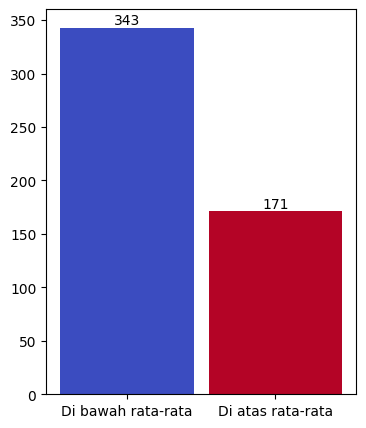

In [14]:
# Menghitung frekuensi variabel Y
frekuensi = data['Y'].value_counts()

# Mengatur ukuran agar lebih ramping
plt.figure(figsize=(4, 5))

# Membuat plot bar chart dengan warna merah dan biru
plt.bar(frekuensi.index, frekuensi.values, color=['#3B4CC0', '#B40426'], width=0.9)

# Menambahkan label nilai pada setiap batang
for i, value in enumerate(frekuensi.values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')
        
# Menampilkan plot
plt.show()

In [15]:
# Load data shapefile kabupaten/kota di Indonesia
map_data = gpd.read_file('C:/Users/user/Desktop/One Drive_Raymond/OneDrive/Dokumen/Skripsi/data_shp/idn_admbnda_adm2_bps_20200401.shp')
map_data.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.360029,0.228968,Aceh Barat,ID1107,NaN,NaN,NaN,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,NaN,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ..."
1,1.963994,0.154136,Aceh Barat Daya,ID1112,NaN,NaN,NaN,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,NaN,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7..."
2,4.590182,0.236396,Aceh Besar,ID1108,NaN,NaN,NaN,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,NaN,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,3.287754,0.316161,Aceh Jaya,ID1116,NaN,NaN,NaN,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,NaN,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6..."
4,4.448584,0.343038,Aceh Selatan,ID1103,NaN,NaN,NaN,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,NaN,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."


In [16]:
map_data = map_data[['ADM2_EN', 'geometry']]

In [17]:
# Identifikasi missing value
map_data.isnull().sum()

ADM2_EN     0
geometry    0
dtype: int64

In [18]:
# Identifikasi jumlah baris & kolom
map_data.shape

(522, 2)

In [19]:
# Gabungkan data indeks kedalaman kemiskinan dengan data geometri peta
map_data = map_data.merge(data, left_on='ADM2_EN', right_on='Kabupaten/Kota', how='left')
map_data

,ADM2_EN,geometry,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Aceh Barat,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",Aceh Barat,38.46,17.93,558638.0,31.59,99.48,100.00,50.01,56.15,98.11,81.54,12.410,Di atas rata-rata
1,Aceh Barat Daya,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7...",Aceh Barat Daya,24.00,15.44,430297.0,33.14,99.12,94.37,52.95,61.78,95.83,58.06,34.610,Di bawah rata-rata
2,Aceh Besar,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2...",Aceh Besar,58.18,13.38,519320.0,37.35,99.52,98.55,48.09,55.01,92.35,77.90,17.810,Di atas rata-rata
3,Aceh Jaya,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6...",Aceh Jaya,12.13,12.51,468854.0,27.58,100.00,83.50,37.44,59.39,84.84,70.14,26.280,Di bawah rata-rata
4,Aceh Selatan,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8...",Aceh Selatan,30.78,12.43,446224.0,22.51,100.00,100.00,47.37,61.11,65.87,56.85,46.380,Di bawah rata-rata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Way Kanan,"POLYGON ((104.92793 -4.19234, 104.92823 -4.192...",Way Kanan,54.28,11.76,409522.0,12.78,98.88,100.00,36.81,58.15,57.32,97.07,47.140,Di atas rata-rata
518,Wonogiri,"POLYGON ((111.18204 -7.71237, 111.18242 -7.712...",Wonogiri,105.19,10.99,376763.0,17.46,96.54,93.90,38.26,55.19,93.17,96.98,29.150,Di bawah rata-rata
519,Wonosobo,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",Wonosobo,128.11,16.17,399180.0,11.08,94.83,92.08,38.70,54.17,85.56,85.11,49.140,Di atas rata-rata
520,Yahukimo,"POLYGON ((139.96223 -3.60980, 139.96314 -3.609...",Yahukimo,71.61,36.21,496222.0,9.07,68.08,84.89,16.30,67.48,24.37,21.05,19.986,Di atas rata-rata


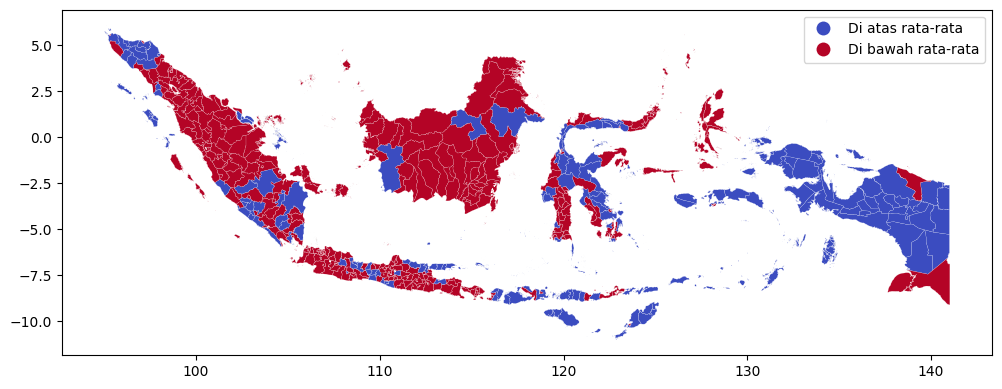

In [20]:
# Membuat visualisasi peta
fig, ax = plt.subplots(1, figsize=(12, 10))

# Plot peta dengan warna berdasarkan indeks kedalaman kemiskinan
warna = {'#3B4CC0', '#B40426'}
warna_kategori = ListedColormap(warna)
map_data.plot(column='Y', cmap=warna_kategori, linewidth=0.1, ax=ax, edgecolor='1', legend=True)

# Mengatur ketajaman peta dengan parameter dpi
#plt.rcParams['figure.dpi'] = 1000

# Menampilkan peta
plt.show()

In [21]:
# Mengubah tipe data pada variabel Y -> dummy
data['Y'] = pd.Categorical(data['Y'])
kode_kategori = {'Di bawah rata-rata': 0, 'Di atas rata-rata': 1}
data['Y'] = data['Y'].map(kode_kategori)

In [22]:
data

,Kabupaten/Kota,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Simeulue,17.86,18.37,493303,31.02,100.00,100.00,54.47,60.37,69.77,66.74,20.940,1
1,Aceh Singkil,24.33,19.18,518951,26.24,97.56,96.59,61.22,59.49,77.94,85.08,42.000,1
2,Aceh Selatan,30.78,12.43,446224,22.51,100.00,100.00,47.37,61.11,65.87,56.85,46.380,0
3,Aceh Tenggara,28.42,12.83,430825,42.29,100.00,100.00,36.42,56.68,86.13,55.99,7.730,0
4,Aceh Timur,62.16,13.91,491550,19.86,100.00,100.00,57.98,62.28,84.56,69.51,24.880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Puncak,41.28,36.25,754778,3.88,46.33,45.95,11.15,70.85,98.91,9.37,28.078,1
510,Dogiyai,29.32,29.48,592213,15.17,72.37,63.12,9.45,46.62,78.83,52.68,33.106,1
511,Intan Jaya,21.86,42.03,769993,12.51,39.83,51.88,18.40,70.05,98.80,86.80,18.668,1
512,Deiyai,31.04,40.31,647902,10.92,84.21,62.06,50.78,70.22,99.10,96.96,22.296,1


In [23]:
# Labeling variabel
variabel_y = data['Y']
variabel_x = data.drop(['Y','Kabupaten/Kota'], axis = 1)

## Balancing Data dengan Metode SMOTE

In [24]:
# Split data 70:30
variabel_x_train, variabel_x_test, variabel_y_train, variabel_y_test = train_test_split(variabel_x,
                                                                   variabel_y,
                                                                   test_size=0.3,
                                                                   random_state=109)

In [25]:
# Melihat jumlah data training
jumlah_data_training = len(variabel_x_train)
print("Jumlah data training:", jumlah_data_training)

# Melihat jumlah data testing
jumlah_data_testing = len(variabel_x_test)
print("Jumlah data testing:", jumlah_data_testing)

Jumlah data training: 359
Jumlah data testing: 155


In [26]:
# Menghitung frekuensi variabel Y data latih
data_latih = variabel_y_train.value_counts()
data_latih

Y
0    238
1    121
Name: count, dtype: int64

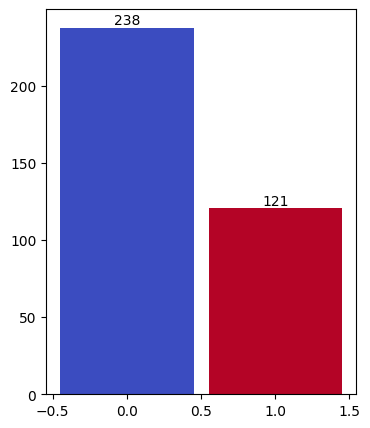

In [27]:
# Menghitung frekuensi variabel Y sebelum balancing
sebelum_balancing = variabel_y_train.value_counts()

# Mengatur ukuran agar lebih ramping
plt.figure(figsize=(4, 5))

# Membuat plot bar chart dengan warna merah dan biru, dan urutan kategori yang ditukar
plt.bar(sebelum_balancing.index, sebelum_balancing.values, color=['#3B4CC0', '#B40426'], width=0.9)

# Menambahkan label nilai pada setiap batang
for i, value in enumerate(sebelum_balancing.values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

### Menerapkan SMOTE untuk oversampling

In [28]:
# Menerapkan SMOTE untuk oversampling
resample = SMOTE(k_neighbors = 5, random_state=42)
variabel_x_res, variabel_y_res = resample.fit_resample(variabel_x_train, variabel_y_train)

variabel_y_res.value_counts()

Y
1    238
0    238
Name: count, dtype: int64

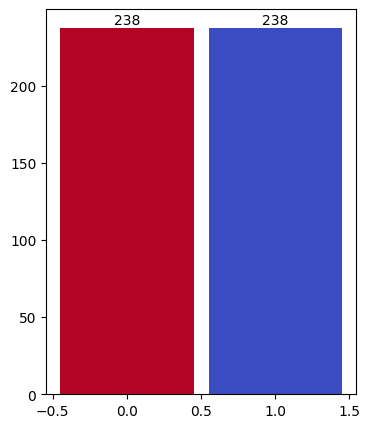

In [29]:
# Menghitung frekuensi variabel Y
sesudah_balancing = variabel_y_res.value_counts()

# Mengatur ukuran agar lebih ramping
plt.figure(figsize=(4, 5))

# Membuat plot bar chart dengan warna merah dan biru, dan urutan kategori yang ditukar
plt.bar(sesudah_balancing.index, sesudah_balancing.values, color=['#3B4CC0', '#B40426'], width=0.9)

# Menambahkan label nilai pada setiap batang
for i, value in enumerate(sesudah_balancing.values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

## Klasifikasi dengan Metode XGBoost

In [30]:
# Membangun model default
model_default = XGBClassifier()

### Tuning Parameter

In [30]:
fold5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold15 = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [31]:
grid_parameter = {
    'n_estimators': [50, 75, 100, 125, 150],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1.0],
    'gamma': [0, 0.1, 1, 0.5, 2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [0, 1, 2, 3, 4],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.6, 0.9, 1.0]
}

#### Stratified 5-fold cross-validation

In [32]:
#grid_search_fold5
grid_search_fold5 = GridSearchCV(estimator=model_default, param_grid=grid_parameter, cv=fold5, scoring='accuracy', n_jobs=-1)
grid_search_fold5.fit(variabel_x_res, variabel_y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.6, 0.9, 1.0],
                  

In [33]:
# Hasil dari pencarian parameter grid_search_fold5
results_df = pd.DataFrame(grid_search_fold5.cv_results_)
print(results_df)

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.027758      0.000551         0.001513        0.000551   
1           0.028204      0.005347         0.000000        0.000000   
2           0.027477      0.007537         0.003655        0.006022   
3           0.031638      0.000000         0.000000        0.000000   
4           0.019142      0.006248         0.000000        0.000000   
...              ...           ...              ...             ...   
78120       0.049283      0.004804         0.003205        0.004669   
78121       0.050396      0.006249         0.003126        0.006251   
78122       0.057974      0.005417         0.006319        0.004091   
78123       0.070924      0.004932         0.002613        0.000550   
78124       0.083732      0.003642         0.001719        0.000396   

      param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                        0.1           0                0.05       

In [34]:
# Hasil terbaik pencarian parameter grid_search_fold5
print("Best Parameters:", grid_search_fold5.best_params_)
print("Best Accuracy:", grid_search_fold5.best_score_)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 1.0, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.939078947368421


#### Stratified 10-fold cross-validation

In [35]:
# grid_search_fold10
grid_search_fold10 = GridSearchCV(estimator=model_default, param_grid=grid_parameter, cv=fold10, scoring='accuracy', n_jobs=-1)
grid_search_fold10.fit(variabel_x_res, variabel_y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.6, 0.9, 1.0],
                  

In [36]:
# Hasil dari pencarian parameter grid_search_fold10
results_df = pd.DataFrame(grid_search_fold10.cv_results_)
print(results_df)

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.015951      0.004476         0.005400        0.004029   
1           0.019323      0.002647         0.002744        0.002302   
2           0.022022      0.002555         0.003636        0.002387   
3           0.018407      0.005019         0.004486        0.005671   
4           0.020266      0.002707         0.003415        0.002801   
...              ...           ...              ...             ...   
78120       0.045294      0.003756         0.002464        0.005145   
78121       0.048096      0.008067         0.005638        0.007152   
78122       0.061386      0.006981         0.004691        0.006092   
78123       0.072741      0.008382         0.003502        0.006383   
78124       0.096223      0.011197         0.002816        0.001259   

      param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                        0.1           0                0.05       

In [37]:
# Hasil terbaik pencarian parameter grid_search_fold10
print("Best Parameters:", grid_search_fold10.best_params_)
print("Best Accuracy:", grid_search_fold10.best_score_)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 125, 'subsample': 0.3}
Best Accuracy: 0.9370124113475178


#### Stratified 15-fold cross-validation

In [38]:
# grid_search_fold15
grid_search_fold15 = GridSearchCV(estimator=model_default, param_grid=grid_parameter, cv=fold15, scoring='accuracy', n_jobs=-1)
grid_search_fold15.fit(variabel_x_res, variabel_y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.6, 0.9, 1.0],
                  

In [39]:
# Hasil dari pencarian parameter grid_search_fold15
results_df = pd.DataFrame(grid_search_fold15.cv_results_)
print(results_df)

       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.015780      0.005079         0.003384        0.004193   
1           0.020974      0.003002         0.002529        0.000603   
2           0.020436      0.008240         0.000706        0.001095   
3           0.018900      0.006280         0.003684        0.005211   
4           0.018328      0.004936         0.002651        0.003575   
...              ...           ...              ...             ...   
78120       0.045922      0.001782         0.002722        0.001334   
78121       0.051503      0.001811         0.002770        0.000863   
78122       0.062091      0.003435         0.003053        0.000836   
78123       0.073802      0.006024         0.002925        0.001543   
78124       0.083349      0.017250         0.002433        0.002385   

      param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                        0.1           0                0.05       

In [40]:
# Hasil terbaik pencarian parameter grid_search_fold15
print("Best Parameters:", grid_search_fold15.best_params_)
print("Best Accuracy:", grid_search_fold15.best_score_)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy: 0.9433467741935484


In [ ]:
# Hasil prediksi tidak tepat
ap = hasil[hasil['Y'] != hasil['Y_pred']]
hasil_pred_tidak_tepat

### Model optimal

In [31]:
# Model optimal
model_optimal= XGBClassifier(objective='binary:logistic',
                             colsample_bytree = 0.6,
                             gamma = 0.1, 
                             learning_rate = 0.5, 
                             max_depth = 6, 
                             min_child_weight = 4, 
                             n_estimators = 100, 
                             subsample = 1.0)

In [32]:
model_optimal.fit(variabel_x_res, variabel_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

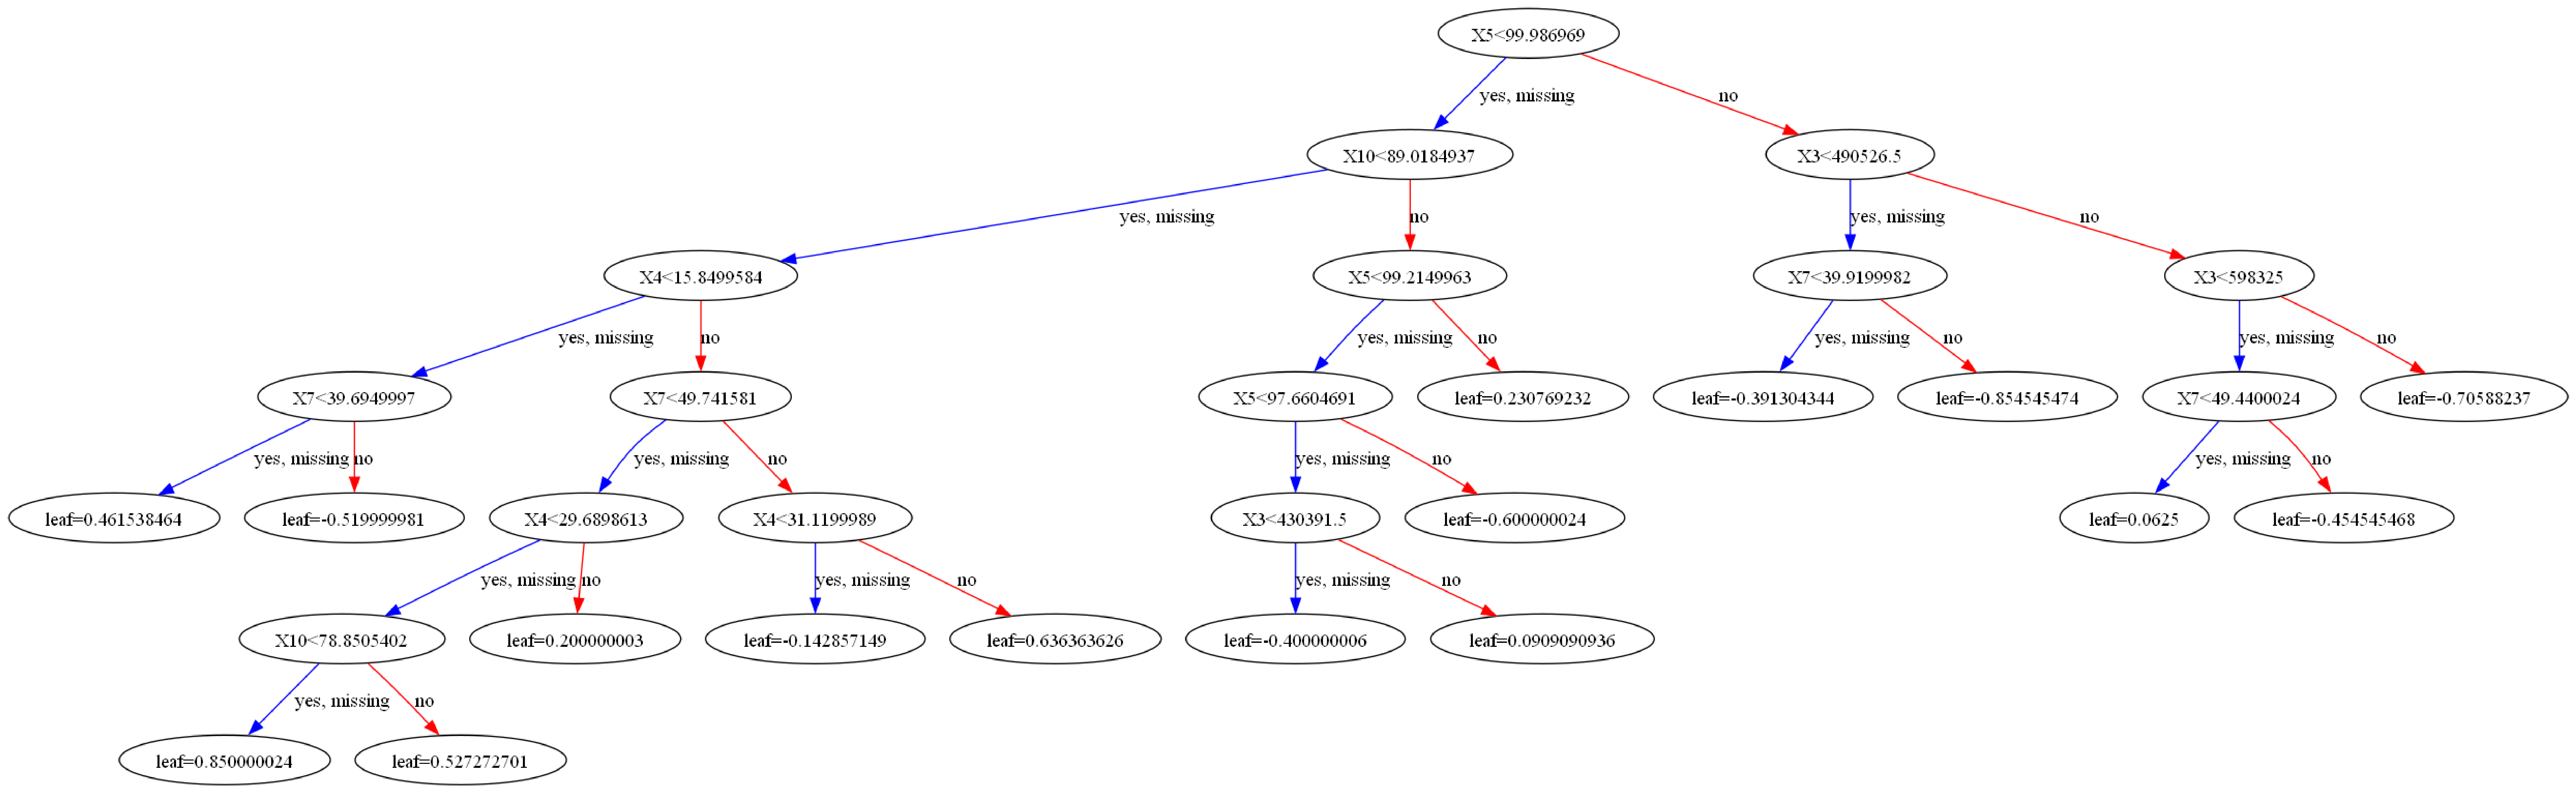

In [42]:
# Visualisasikan pohon pertama dari model
plot_tree(model_optimal, num_trees=0)
fig = plt.gcf()
#fig.set_dpi(500)
fig.set_size_inches(100, 50)
#plt.savefig ("contoh_pohon_3.pdf")
plt.show()

In [34]:
pred_model_optimal = model_optimal.predict(variabel_x_test)

In [35]:
hasil = variabel_x_test

# Menambahkan kolom 'Y' ke dalam hasil
hasil['Y'] = variabel_y_test

# Menambahkan kolom 'Y_pred' ke dalam hasil
hasil['Y_pred'] = pred_model_optimal

# Menampilkan hasil
hasil

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y,Y_pred
69,2.28,3.02,491488,53.29,100.00,86.21,48.58,49.69,100.00,100.00,36.170,0,0
202,99.83,11.53,390478,17.98,96.42,94.02,37.89,55.56,95.07,92.89,36.330,0,0
54,16.03,6.89,480196,40.52,100.00,100.00,45.87,53.96,44.09,51.53,45.070,0,0
45,33.91,9.09,527922,31.27,100.00,90.53,40.27,55.16,87.31,77.51,9.030,0,0
49,22.65,12.45,515456,34.61,100.00,92.51,43.84,58.60,68.59,97.31,33.740,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,47.13,31.31,472692,6.07,49.83,51.75,14.05,74.84,10.16,13.05,18.364,1,1
490,36.80,24.48,627921,45.37,96.58,88.86,41.89,50.42,78.89,96.94,12.190,1,1
465,11.89,4.99,362100,22.42,99.13,100.00,52.71,57.62,84.28,60.65,8.340,0,0
147,16.44,6.87,446856,20.23,100.00,100.00,43.23,49.19,61.92,100.00,4.640,0,0


In [36]:
# Hasil prediksi tidak tepat
hasil_pred_tidak_tepat = hasil[hasil['Y'] != hasil['Y_pred']]
hasil_pred_tidak_tepat

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y,Y_pred
169,147.12,11.94,483319,17.61,99.15,94.20,48.65,53.93,93.03,85.89,57.85,0,1
463,6.93,12.00,507555,40.20,100.00,100.00,31.41,48.53,64.05,73.44,2.04,0,1
170,120.12,10.14,371870,14.41,98.36,89.47,45.83,51.50,97.19,93.35,44.74,1,0
251,149.64,11.06,536544,33.15,100.00,85.80,37.69,50.27,87.46,97.61,31.42,1,0
20,19.41,10.62,469348,35.05,100.00,100.00,46.53,45.95,95.52,96.12,34.15,1,0
434,11.56,13.85,382129,32.92,98.31,91.83,44.28,54.15,86.10,66.04,15.56,1,0
398,16.74,12.24,430976,21.64,98.63,88.83,47.69,55.64,93.87,64.06,25.54,1,0
415,29.31,12.18,366753,38.16,95.86,95.08,23.94,53.36,63.69,86.42,22.98,0,1
414,46.50,12.49,381015,40.93,99.83,94.34,60.20,55.49,75.92,90.84,61.08,0,1
108,31.06,12.03,384199,23.96,100.00,96.80,35.24,56.11,62.92,80.52,12.69,1,0


## Evaluasi Model

In [37]:
# Confusion matrix
conf_matrix = confusion_matrix(variabel_y_test, pred_model_optimal)

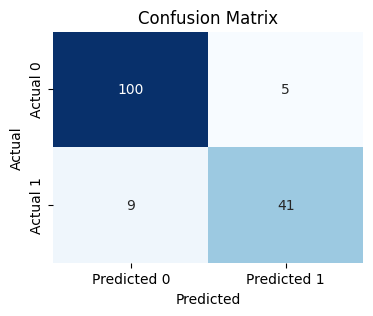

In [38]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
# Menghitung nilai accuracy
accuracy = accuracy_score(pred_model_optimal, variabel_y_test)
print ("Accuracy:", accuracy)

# Menghitung nilai Precision
precision = precision_score(variabel_y_test, pred_model_optimal)
print("Precision:", precision)

# Menghitung nilai Recall (Sensitivity)
recall = recall_score(variabel_y_test, pred_model_optimal)
print("Recall:", recall)

# Menghitung nilai F1-score
f1 = f1_score(variabel_y_test, pred_model_optimal)
print("F1-score:", f1)

# Menghitung Specificity
specificity = 100 / (100 + 5)
print("Specificity:", specificity)

Accuracy: 0.9096774193548387
Precision: 0.8913043478260869
Recall: 0.82
F1-score: 0.8541666666666666
Specificity: 0.9523809523809523


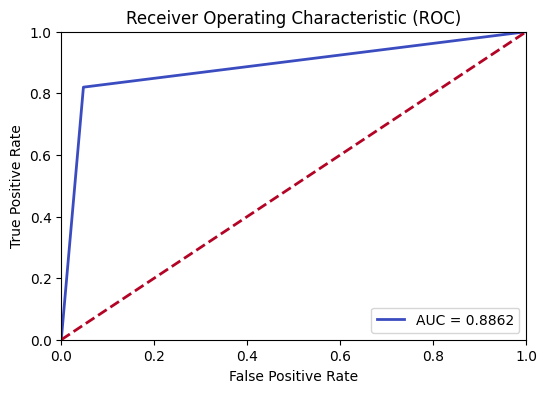

In [40]:
# Menghitung false positive rate (FPR), true positive rate (TPR), dan ambang batas (thresholds)
fpr, tpr, thresholds = roc_curve(variabel_y_test, pred_model_optimal)

# Menghitung AUC
auc = roc_auc_score(variabel_y_test, pred_model_optimal)

# Membuat plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='#3B4CC0', lw=2, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], color='#B40426', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [41]:
import math

# Nilai leaf yang ingin diubah menjadi probabilitas
nilai_leaf = -0.0466666669

# Menggunakan rumus sigmoid
probabilitas = 1 / (1 + math.exp(-nilai_leaf))

# Hasil probabilitas
print(probabilitas)

1-probabilitas

0.48833545009798657


0.5116645499020134